Zamierzasz kupić mieszkanie. Upatrzone M kosztuje w tym momencie 120 tys. zł, jednak przewidujesz, że przez następne 5 lat ceny mieszkań będą rosły w tempie 5% rocznie. W tym momencie nie dysponujesz wystarczającymi środkami, dlatego znajdujesz ofertę banku, który proponuje lokatę, do której dopłacasz pewna stałą kwotę na koniec każdego miesiąca. Bank oferuje nominalną stopę procentową w wysokości 12% w skali roku, przy kapitalizacji miesięcznej.

In [28]:
import numpy as np
import numpy_financial as npf
import matplotlib.pyplot as plt

In [61]:
freq = 12
rate_flat = 0.05
years = 5
pv = 120000
rate_deposit = 0.12

1. Ile będzie wynosiła orientacyjna cena mieszkania za 5 lat?

In [85]:
periods = np.arange(1,years+1,dtype=int)
fv = -np.round(npf.fv(rate_flat,periods,0,pv),2)
print("Cena mieszkania za 5 lat: "+str("{:.2f}".format(fv[-1])))

[126000.   132300.   138915.   145860.75 153153.79]
Cena mieszkania za 5 lat: 153153.79


2. Ile musisz wpłacać do banku każdego miesiąca, aby przy przedstawionej ofercie uzbierać na mieszkanie w ciągu 5 lat?

In [63]:
rate_deposit/=freq
nper=years*freq
print(nper)

60


In [64]:
deposit_value=-npf.pmt(rate_deposit,nper,0,fv)
print("Miesięczna kwota do wpłaty: "+str("{:.2f}".format(deposit_value)))

Miesięczna kwota do wpłaty: 1875.28


3. Stwórz wykres przedstawiający, jak w interwałach miesięcznych zmieniać się będzie cena mieszkania (liniowy wzrost w całym okresie) oraz wartość twojej lokaty.

In [103]:
periods = np.arange(0,60)    
interest =  npf.fv(rate_deposit, periods, -deposit_value, -deposit_value)
interest

array([  1875.2835694 ,   3769.31997449,   5682.29674364,   7614.40328047,
         9565.83088268,  11536.7727609 ,  13527.42405791,  15537.98186789,
        17568.64525597,  19619.61527793,  21691.09500011,  23783.28951951,
        25896.4059841 ,  28030.65361334,  30186.24371887,  32363.38972546,
        34562.30719212,  36783.21383344,  39026.32954117,  41291.87640598,
        43580.07873944,  45891.16309624,  48225.3582966 ,  50582.89544896,
        52964.00797285,  55368.93162198,  57797.9045076 ,  60251.16712207,
        62728.96236269,  65231.53555572,  67759.13448068,  70312.00939488,
        72890.41305823,  75494.60075821,  78124.8303352 ,  80781.36220795,
        83464.45939943,  86174.38756282,  88911.41500785,  91675.81272733,
        94467.854424  ,  97287.81653764, 100135.97827241, 103012.62162454,
       105918.03141018, 108852.49529368, 111816.30381602, 114809.75042358,
       117833.13149721, 120886.74638159, 123970.8974148 , 127085.88995835,
       130232.03242733, 1

Text(0, 0.5, 'Wartość [zł]')

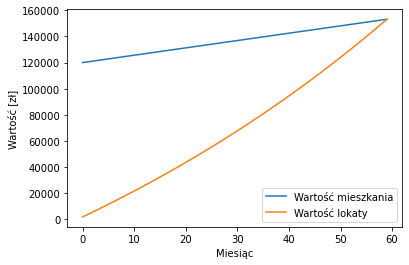

In [104]:
plt.plot([0,59],[pv,fv[-1]],label='Wartość mieszkania')
plt.plot(periods,interest,label='Wartość lokaty')
plt.legend()
plt.xlabel("Miesiąc")
plt.ylabel("Wartość [zł]")